<center>
        <h1>AUA Spring 2023</h1>
        <h2>DS 207 Time Series Forecasting</h2>
        <h1> Second Midterm exam  </h1>  
</center>

<center>
        <h1> Mher Movsisyan</h1>
        <h1> Student ID A09180049  </h1>
</center>

In [1]:
import pandas as pd
import numpy as np

## ENTER LAST 5 VALUES OF YOUR STUDENT ID (instead of 12345)

In [2]:
id_last_5 = 80049  # CHANGE

### Problem 1

In [27]:
## This chunck of code extracts you data (do not change it)

df_gdp = pd.read_excel("dataset_1.xlsx")
df_gdp = df_gdp.loc[df_gdp['LOCATION'] == df_gdp["LOCATION"].sample(random_state=id_last_5).values.tolist()[0]]

### For the modeling you need to use TIME and Value

In [28]:
df_gdp

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
3223,SWE,QGDP,VOLIDX,IDX,Q,1970-Q4,39.7,E
3224,SWE,QGDP,VOLIDX,IDX,Q,1971-Q1,39.2,E
3225,SWE,QGDP,VOLIDX,IDX,Q,1971-Q2,38.8,E
3226,SWE,QGDP,VOLIDX,IDX,Q,1971-Q3,39.5,E
3227,SWE,QGDP,VOLIDX,IDX,Q,1971-Q4,39.1,E
...,...,...,...,...,...,...,...,...
3419,SWE,QGDP,VOLIDX,IDX,Q,2019-Q4,108.4,NaN
3420,SWE,QGDP,VOLIDX,IDX,Q,2020-Q1,108.1,NaN
3421,SWE,QGDP,VOLIDX,IDX,Q,2020-Q2,99.9,NaN
3422,SWE,QGDP,VOLIDX,IDX,Q,2020-Q3,106.3,NaN


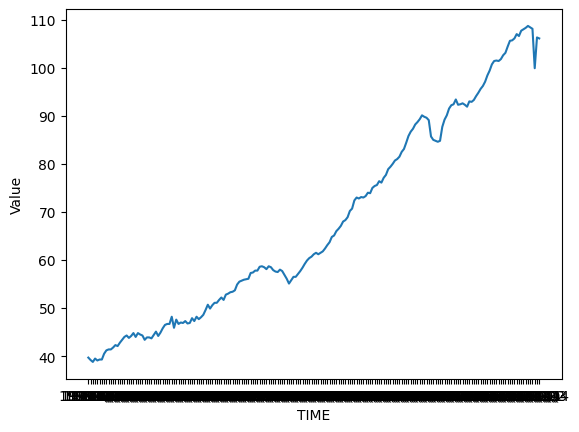

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(data=df_gdp, x="TIME", y="Value")
df = df_gdp[["TIME", "Value"]]

There is trend, there are no structural breaks, there can be slight seasonality (in the dips) but it is not significant and will only be considered if the model ends up with too much error. The process's variance suggests an additive one

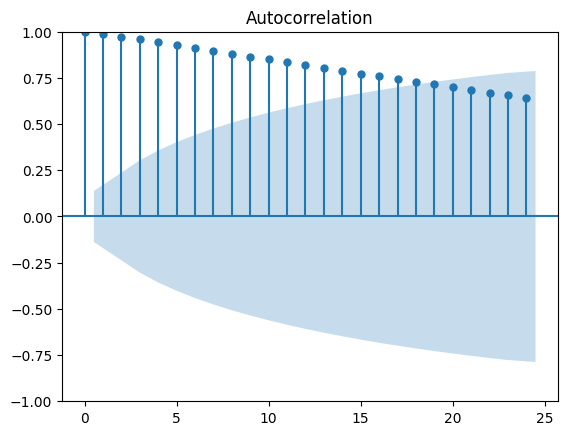

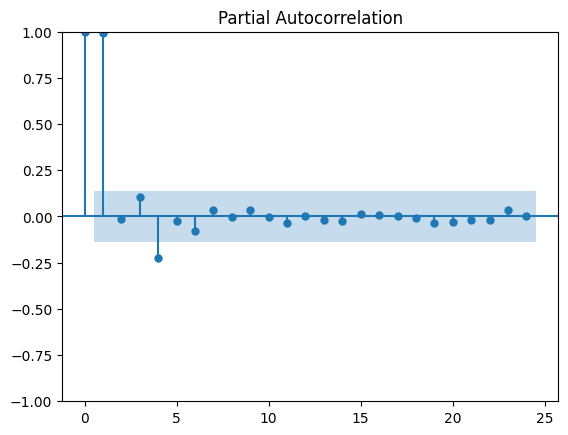

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from warnings import simplefilter
simplefilter("ignore")
plot_acf(df.Value)
plot_pacf(df.Value)
plt.show()

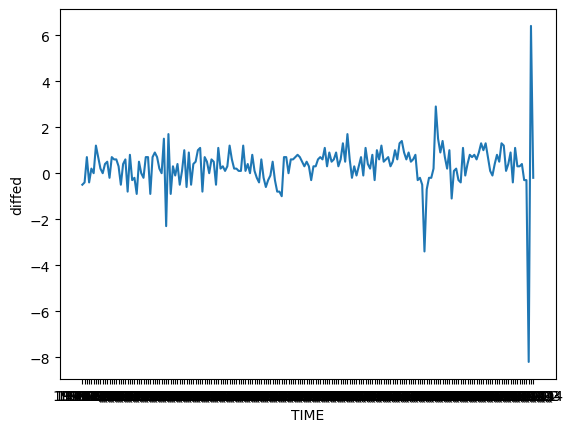

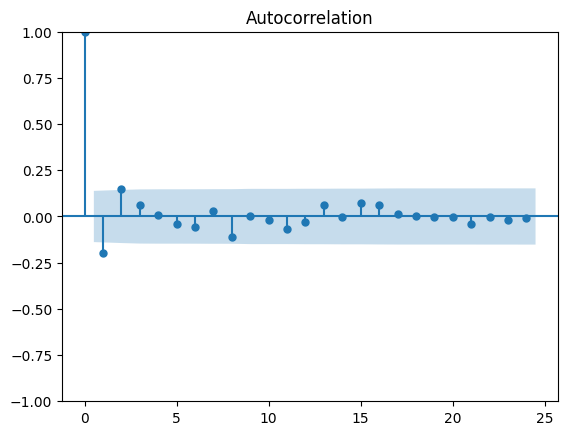

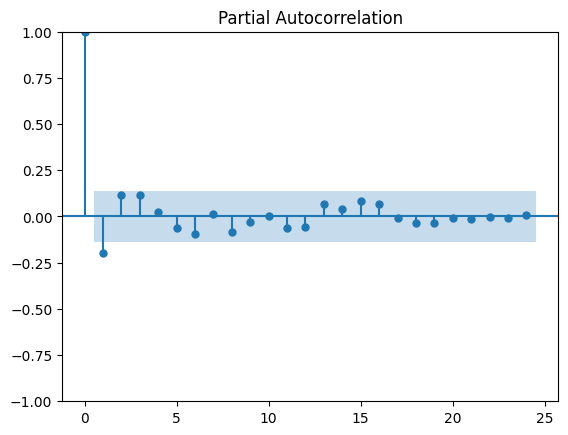

In [31]:
df["diffed"] = df.Value.diff()
df_d = df[~df.diffed.isna()]
sns.lineplot(data=df_d, x="TIME", y="diffed")
plot_acf(df_d.diffed)
plot_pacf(df_d.diffed)
plt.show()

In [34]:
from statsmodels.tsa.stattools import adfuller

X = df_d.diffed
result =adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.519142
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575


In [37]:
from statsmodels.tsa.stattools import kpss
result = kpss(X)

print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('number of lags: %f' % result[2])

print('Critical Values:')
for key, value in result[3].items():
    print('\t%s: %.3f' % (key, value))

KPSS Statistic: 0.234431
p-value: 0.100000
number of lags: 4.000000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


The data is trend-stationary, I will choose an order 1 differenciation, order 2 AR and order 1 MA

In [33]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df.Value, order=(2,1,1))
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  201
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -282.575
Date:                Wed, 03 May 2023   AIC                            573.150
Time:                        13:50:05   BIC                            586.343
Sample:                             0   HQIC                           578.489
                                - 201                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7983      0.044     18.249      0.000       0.713       0.884
ar.L2          0.2001      0.036      5.514      0.000       0.129       0.271
ma.L1         -0.9802      0.037    -26.723      0.0

In [52]:
import pmdarima as pm

model = pm.auto_arima(df.Value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # With Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=567.751, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=573.085, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=567.299, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=569.038, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=591.848, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=566.033, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=565.440, Time=0.09 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=567.433, Time=0.17 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=567.438, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=566.996, Time=0.19 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=567.219, Time=0.57 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=576.523, Time=0.12 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0] intercept
Total fit time: 1.722 seconds
                               SARIMAX Results                                
Dep. Variable:       

The autoarima chose a model ARIMA(3,1,0), (0,0,0) and is quite similar to what we chose

In [59]:
from sklearn.model_selection import train_test_split


x_train, x_test = df.Value[:int(len(df)*0.9)], df.Value[int(len(df)*0.9):]
x_train

3223     39.7
3224     39.2
3225     38.8
3226     39.5
3227     39.1
        ...  
3398     96.2
3399     97.1
3400     98.4
3401     99.4
3402    100.7
Name: Value, Length: 180, dtype: float64

In [60]:
x_test

3403    101.4
3404    101.5
3405    101.4
3406    101.8
3407    102.6
3408    103.1
3409    104.4
3410    105.6
3411    105.7
3412    106.1
3413    107.0
3414    106.6
3415    107.7
3416    108.0
3417    108.3
3418    108.7
3419    108.4
3420    108.1
3421     99.9
3422    106.3
3423    106.1
Name: Value, dtype: float64

In [61]:
model = ARIMA(x_train, order=(3,1,0))
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  180
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -184.873
Date:                Wed, 03 May 2023   AIC                            377.745
Time:                        14:18:29   BIC                            390.495
Sample:                             0   HQIC                           382.915
                                - 180                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1106      0.061      1.801      0.072      -0.010       0.231
ar.L2          0.3263      0.072      4.520      0.000       0.185       0.468
ar.L3          0.2083      0.095      2.193      0.0

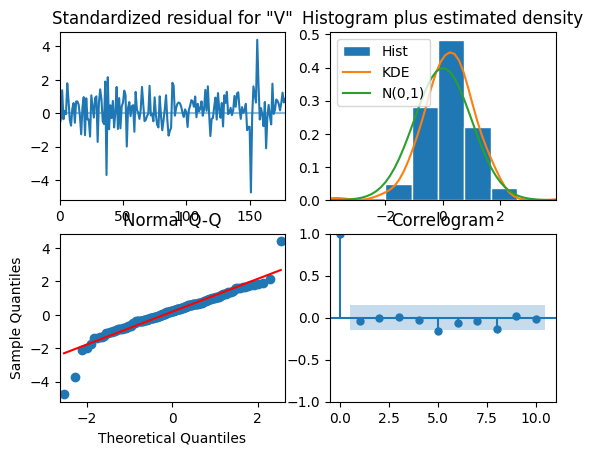

In [62]:
result.plot_diagnostics()
plt.show()

In [63]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(result.resid, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,0.370363,0.999998


Here we see a high p-value and the plots, which suggest serial correlation

In [64]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
df["exp"] = SimpleExpSmoothing(df.Value, initialization_method='estimated').fit(smoothing_level=0.2, optimized=False,use_brute=True).fittedvalues
df["exp"]

3223     38.553333
3224     38.782667
3225     38.866133
3226     38.852907
3227     38.982325
           ...    
3419    106.838777
3420    107.151022
3421    107.340818
3422    105.852654
3423    105.942123
Name: exp, Length: 201, dtype: float64

In [65]:
x_exp_train, x_exp_test = df.exp[:int(len(df)*0.9)], df.exp[int(len(df)*0.9):]

In [66]:
m1 = ARIMA(x_train, order=(3,1,0))
m2 = ARIMA(x_train, order=(2,1,1))
m3 = ARIMA(x_exp_train, order=(2,1,1))
r1, r2, r3 = m1.fit(), m2.fit(), m3.fit()

print(r1.summary(), r2.summary(), r3.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  180
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -184.873
Date:                Wed, 03 May 2023   AIC                            377.745
Time:                        14:21:01   BIC                            390.495
Sample:                             0   HQIC                           382.915
                                - 180                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1106      0.061      1.801      0.072      -0.010       0.231
ar.L2          0.3263      0.072      4.520      0.000       0.185       0.468
ar.L3          0.2083      0.095      2.193      0.0

### Problem 2

In [16]:
## This chunck of code extracts you data (do not change it)

df_crp = pd.read_excel("dataset_2.xlsx")
df_crp = df_crp.loc[df_crp['coin_name'] == df_crp["coin_name"].sample(random_state=id_last_5).values.tolist()[0]]

### For the modeling you can use one of these columns low, high, open, close

In [17]:
df_crp

,datetime,low,high,open,close,volumefrom,volumeto,cryptocurrency,image_url,coin_name
2406,2019-12-06,2.678,2.755,2.698,2.745,1035973.48,2812539.15,EOS,https://www.cryptocompare.com/media/1383652/eo...,EOS
2407,2019-12-07,2.722,2.772,2.745,2.738,429272.51,1179530.46,EOS,https://www.cryptocompare.com/media/1383652/eo...,EOS
2408,2019-12-08,2.712,2.793,2.738,2.759,480055.75,1320705.01,EOS,https://www.cryptocompare.com/media/1383652/eo...,EOS
2409,2019-12-09,2.626,2.767,2.759,2.669,788386.90,2121689.46,EOS,https://www.cryptocompare.com/media/1383652/eo...,EOS
2410,2019-12-10,2.582,2.678,2.669,2.614,1076401.97,2828692.02,EOS,https://www.cryptocompare.com/media/1383652/eo...,EOS
...,...,...,...,...,...,...,...,...,...,...
2802,2021-01-05,2.714,2.957,2.822,2.894,6260631.78,17787581.31,EOS,https://www.cryptocompare.com/media/1383652/eo...,EOS
2803,2021-01-06,2.853,3.461,2.894,3.376,18587525.19,59407219.82,EOS,https://www.cryptocompare.com/media/1383652/eo...,EOS
2804,2021-01-07,3.054,3.454,3.376,3.196,15601755.22,51133523.02,EOS,https://www.cryptocompare.com/media/1383652/eo...,EOS
2805,2021-01-08,2.891,3.255,3.196,3.114,10336578.05,31822540.07,EOS,https://www.cryptocompare.com/media/1383652/eo...,EOS
